As a practical example, we’ll focus on classifying images as dogs or cats, in a dataset containing 4,000 pictures of cats and dogs (2,000 cats, 2,000 dogs). We’ll use 2,000 pictures for training—1,000 for validation, and 1,000 for testing.

In this section, we’ll review one basic strategy to tackle this problem: training a new model from scratch using what little data you have. You’ll start by naively training a small convnet on the 2,000 training samples, without any regularization, to set a base-line for what can be achieved. This will get you to a classification accuracy of 71%. At that point, the main issue will be overfitting.

Then we’ll introduce **data augmentation**, a powerful technique for mitigating overfitting in computer vision. By using data augmentation, you’ll improve the network to reach an accuracy of 82%.

In [1]:
import os, shutil

# Path to the directory where the original dataset was uncompressed
original_dataset_dir = '/home/gary/Downloads/train'

# Directory where you’ll store your smaller dataset
base_dir = './data/dogs-vs-cats/'
os.mkdir(base_dir)

# Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [3]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [4]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [5]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [6]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [7]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


We’ll reuse the same general structure: the convnet will be a stack of alternated `Conv2D` (with `relu` activation) and `MaxPooling2D` layers. But because you’re dealing with bigger images and a more complex problem, you’ll make our network larger, accordingly: it will have one more `Conv2D` + `MaxPooling2D` stage. This serves both **to augment the capacity of the network and to further reduce the size of the feature maps** so they aren’t overly large when you reach the `Flatten` layer.

Because we’re attacking a binary-classification problem, we’ll end the network with a single unit (a `Dense` layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

In [8]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

For the compilation step, you’ll go with the `RMSprop` optimizer, as usual. Because *we ended the network with a single sigmoid unit*, we’ll use **binary crossentropy as the loss**.

In [10]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

By now we know data should be formatted into appropriately preprocessed floating-point tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:

1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (recall neural networks prefer to deal with small input values).

Fortunately Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at `keras.preprocessing.image`. In particular, it contains the class `ImageDataGenerator`, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


For reference, let's look at the shape of the output from these generators.

Note: It yields batches of $150 \times 150$ RGB images (shape `(20, 150, 150, 3)`) and binary labels (shape `(20,)`). There are 20 samples in each batch (the batch size).

In [12]:
for data_batch, labels_batch in train_generator:
    # Print a single output shape and break the loop
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let’s fit the model to the data using the generator.

It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, **the Keras model needs to know how many samples to draw from the generator before declaring an epoch over**. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the generator—that is, after having run for `steps_per_epoch` gradient descent steps—the fitting process will go to the next epoch. **In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.**

In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using `fit`, we've seen that we can pass a `validation_data` argument. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as `validation_data`, then this generator is expected to yield *batches of validation data endlessly*; thus you should also specify the `validation_steps` argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 32s 315ms/step - loss: 0.6929 - acc: 0.5524 - val_loss: 0.6718 - val_acc: 0.5790
Epoch 2/30
100/100 [==============================] - 31s 312ms/step - loss: 0.6609 - acc: 0.6104 - val_loss: 0.6401 - val_acc: 0.6310
Epoch 3/30
100/100 [==============================] - 31s 312ms/step - loss: 0.6284 - acc: 0.6411 - val_loss: 0.6209 - val_acc: 0.6390
Epoch 4/30
100/100 [==============================] - 31s 312ms/step - loss: 0.5627 - acc: 0.7048 - val_loss: 0.6199 - val_acc: 0.6530
Epoch 5/30
100/100 [==============================] - 31s 312ms/step - loss: 0.5313 - acc: 0.7437 - val_loss: 0.5797 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 31s 313ms/step - loss: 0.5013 - acc: 0.7525 - val_loss: 0.5697 - val_acc: 0.7050
Epoch 7/30
100/100 [==============================] - 31s 313ms/step - loss: 0.4722 - acc: 0.7720 - val_loss: 0.5686 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 3

In [14]:
model.save('cats_and_dogs_small_1.h5')

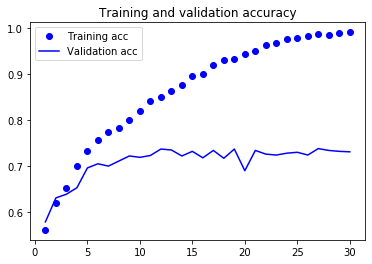

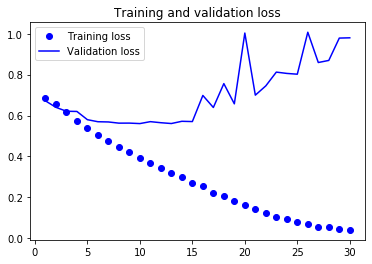

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.

Because you have relatively few training samples (2,000), overfitting will be your number-one concern. You already know about a number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). **We’re now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: data augmentation.**

---

## Using data augmentation

Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the `ImageDataGenerator` instance. [Documentation](https://keras.io/api/preprocessing/image/)

Let’s get started with an example.

In [16]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

Let’s look at the augmented images generated above.

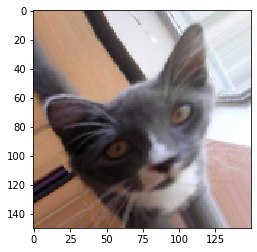

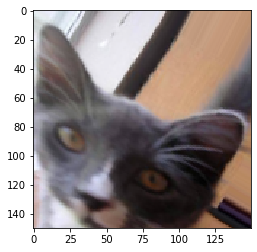

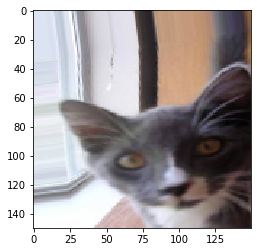

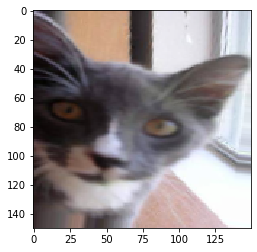

In [17]:
from keras.preprocessing import image

# Turn images in directory into a python list
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3] # We'll display this one

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert to Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshapes to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# Generates batches of randomly transformed images.
# Loops indefinitely, so you need to break the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

If you train a new network using this data-augmentation configuration, the network will never see the same input twice. **The inputs it sees are still heavily intercorrelated, because they come from a small number of original images**—you can’t produce new information, you can only remix existing information. As such, this may not be enough to completely get rid of overfitting.

To further fight overfitting, you’ll also add a `Dropout` layer to your model, right before the densely connected classifier.

In [18]:
model = models.Sequential()

# Include a single dropout layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # Resizes all images to 150 × 150
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

history = model.fit(
    train_generator,
    steps_per_epoch=100, # num_samples / batch_size = steps_per_epoch
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 33s 320ms/step - loss: 0.6992 - acc: 0.4900 - val_loss: 0.6850 - val_acc: 0.5060
Epoch 2/100
100/100 [==============================] - 32s 319ms/step - loss: 0.6837 - acc: 0.5451 - val_loss: 0.6645 - val_acc: 0.5800
Epoch 3/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6780 - acc: 0.5695 - val_loss: 0.6500 - val_acc: 0.6160
Epoch 4/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6623 - acc: 0.5881 - val_loss: 0.6442 - val_acc: 0.5980
Epoch 5/100
100/100 [==============================] - 32s 319ms/step - loss: 0.6503 - acc: 0.6150 - val_loss: 0.6118 - val_acc: 0.6510
Epoch 6/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6284 - acc: 0.6444 - val_loss: 0.5966 - val_acc: 0.6590
Epoch 7/100
100/100 [==============================] - 32s 321ms/step - loss: 0.6302 - acc: 0.6356 -

100/100 [==============================] - 32s 320ms/step - loss: 0.4384 - acc: 0.8075 - val_loss: 0.4823 - val_acc: 0.7860
Epoch 61/100
100/100 [==============================] - 32s 321ms/step - loss: 0.4330 - acc: 0.7965 - val_loss: 0.4523 - val_acc: 0.7850
Epoch 62/100
100/100 [==============================] - 32s 320ms/step - loss: 0.4539 - acc: 0.7967 - val_loss: 0.4609 - val_acc: 0.7750
Epoch 63/100
100/100 [==============================] - 32s 321ms/step - loss: 0.4354 - acc: 0.8092 - val_loss: 0.4839 - val_acc: 0.7820
Epoch 64/100
100/100 [==============================] - 32s 320ms/step - loss: 0.4549 - acc: 0.7806 - val_loss: 0.5026 - val_acc: 0.7500
Epoch 65/100
100/100 [==============================] - 32s 320ms/step - loss: 0.4183 - acc: 0.8113 - val_loss: 0.4313 - val_acc: 0.8110
Epoch 66/100
100/100 [==============================] - 32s 321ms/step - loss: 0.4267 - acc: 0.8012 - val_loss: 0.4456 - val_acc: 0.7970
Epoch 67/100
100/100 [==============================] 

In [20]:
model.save('cats_and_dogs_small_2.h5')

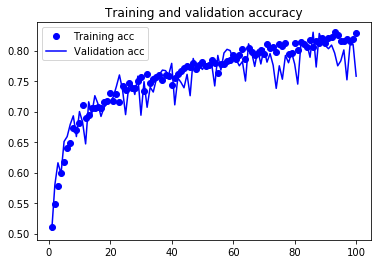

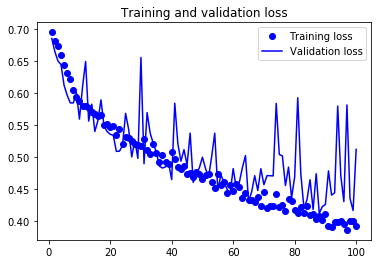

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

By using regularization techniques even further, and by tuning the network’s parameters (such as the number of filters per convolution layer, or the number of layers in the network), you may be able to get an even better accuracy, likely up to 86% or 87%. But it would prove difficult to go any higher just by training your own convnet from scratch, because you have so little data to work with. As a next step to improve your accuracy on this problem, you’ll have to use a pretrained model, which is the focus of the next two sections.